In [21]:
import os
from dotenv import load_dotenv

In [22]:
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [23]:
from langchain_openai import ChatOpenAI

In [24]:
llm = ChatOpenAI()

In [25]:
llm.invoke("hello how are you my firend?")

AIMessage(content="Hello! I'm just a computer program, so I don't have feelings or emotions, but I'm here to assist you. How can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 15, 'total_tokens': 48, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bkpv4jHcWVsFg74OC4PCOOpZtHqlV', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--12bed659-7a4c-4807-aa97-511ddc5d3830-0', usage_metadata={'input_tokens': 15, 'output_tokens': 33, 'total_tokens': 48, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

1. Data Ingestion

In [26]:
from langchain_openai import OpenAIEmbeddings

In [27]:
embeddings = OpenAIEmbeddings(
    model="text-embedding-3-large"
)

In [28]:
vector1 = embeddings.embed_query("hello how are you my firend?")

In [29]:
len(vector1)

3072

In [30]:
url = "https://lilianweng.github.io/posts/2023-06-23-agent/"

In [31]:
from langchain_community.document_loaders import WebBaseLoader

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [32]:
web_loader = WebBaseLoader(url)

In [33]:
data = web_loader.load()

In [34]:
data[0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
 'title': "LLM Powered Autonomous Agents | Lil'Log",
 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\

In [35]:
data[0].metadata["description"]

'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model 

In [36]:
content = data[0].page_content

In [37]:
content

'\n\n\n\n\n\nLLM Powered Autonomous Agents | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nAgent System Overview\n\nComponent One: Planning\n\nTask Decomposition\n\nSelf-Reflection\n\n\nComponent Two: Memory\n\nTypes of Memory\n\nMaximum Inner Product Search (MIPS)\n\n\nComponent Three: Tool Use\n\nCase Studies\n\nScientific Discovery Agent\n\nGenerative Agents Simulation\n\nProof-of-Concept Examples\n\n\nChallenges\n\nCitation\n\nReferences\n\n\n\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The

In [38]:
data

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [39]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [40]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=100, chunk_overlap=25)

In [41]:
docs = text_splitter.split_documents(data)

In [42]:
docs

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [43]:
len(docs)

165

In [44]:
from langchain_community.vectorstores import Chroma

In [45]:
vectorstore = Chroma.from_documents(
    documents=docs,
    collection_name="rag-chroma",
    embedding=embeddings
)

2. Data Retriever

In [46]:
retriever = vectorstore.as_retriever()

In [47]:
retriever.invoke("What is agent and prompt ?")

[Document(metadata={'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utiliz

In [48]:
from langchain.tools.retriever import create_retriever_tool

In [49]:
retriever_tool = create_retriever_tool(
    retriever,
    "retriever_blog_post",
    "Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering and adversarial attacks"
)

In [50]:
tools = [retriever_tool]

In [51]:
from langgraph.prebuilt import ToolNode

In [52]:
retriever_node = ToolNode(tools)

3. Generator

3.1. Build Graph

In [1]:
from typing import Annotated, Sequence, TypedDict
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph.message import add_messages
from pydantic import BaseModel, Field

In [2]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [3]:
from langchain_core.prompts import PromptTemplate

In [4]:
# def LLM_Decision_Maker(state: AgentState):
#     print ("-----Call LLM_Decision_Maker-----")
#     messages = state["messages"]

#     if len(messages) > 1:
#         last_message = messages[-1]
#         question = last_message.content
#         prompt = PromptTemplate(
#             template=""" You are a helpful assistant whatever question has been asked to find out that in the given question and answer.
#                         Here is the question: {question}
#                     """,
#             input_variables=["question"]
#         )
#         chain = prompt | llm
#         response = chain.invoke({"question": question})
#     else:
#         llm_with_tool = llm.bind_tools(tools)
#         response = llm_with_tool.invoke(messages)
    
#     return {"messages": [response]}

In [5]:
def LLM_Decision_Maker(state: AgentState):
    print ("-----Call LLM_Decision_Maker-----")
    messages = state["messages"]
    last_message = messages[-1]
    question = last_message.content
    llm_with_tool = llm.bind_tools(tools)
    response = llm_with_tool.invoke(question)
    return {"messages": [response]}

In [6]:
class Grade(BaseModel):
    binary_score: str = Field(description="Relevance score 'yes' or 'no'")

In [7]:
# Use it for Type Hinding
from typing import Literal

In [8]:
def grade_documents(state: AgentState) -> Literal["Output Generator", "Query Rewriter"]:
    llm_with_structured_op = llm.with_structured_output(Grade)
    prompt = PromptTemplate(
        template="""You are a grader deciding if a document is relevant to a user’s question.
                    Here is the document: {context}
                    Here is the user’s question: {question}
                    If the document talks about or contains information related to the user’s question, mark it as relevant. 
                    Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                    input_variables=["context", "question"]
    )
    chain = prompt | llm_with_structured_op
    messages = state["messages"]
    question = messages[0].content
    docs = messages[-1].content

    scored_result = chain.invoke({"question": question, "context": docs})
    score = scored_result.binary_score

    if score == "yes":
        print ("-----DECISION: Docs are Relevant-----")
        return "generator"
    else:
        print ("-----DECISION: Docs are NOT Relevant-----")
        return "rewriter"

In [9]:
from langchain import hub

In [10]:
hub.pull("rlm/rag-prompt").pretty_print()

================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [11]:
def generate(state: AgentState):
    print ("-----GENERATE-----")
    messages = state["messages"]
    question = messages[0].content
    docs = messages[-1].content

    prompt = hub.pull("rlm/rag-prompt")

    rag_chain = prompt | llm

    response = rag_chain.invoke({"question": question, "context": docs})
    
    return {"messages": [response]}

In [12]:
def rewrite(state: AgentState):
    print ("-----REWRITE-----")
    messages = state["messages"]
    question = messages[0].content
    input= [HumanMessage(content=f"""Look at the input and try to reason about the underlying semantic intent or meaning. 
                    Here is the initial question: {question} 
                    Formulate an improved question: """)
       ]
    response=llm.invoke(input)
    return {"messages": [response]}

In [13]:
from langgraph.prebuilt import tools_condition

In [14]:
from langgraph.graph import END, StateGraph, START

In [53]:
workflow = StateGraph(AgentState)

In [54]:
workflow.add_node("LLM Decision Maker", LLM_Decision_Maker)
workflow.add_node("Vector Retriever", retriever_node)
workflow.add_node("Output Generator", generate)
workflow.add_node("Query Rewriter", rewrite)

workflow.add_edge(START, "LLM Decision Maker")
workflow.add_conditional_edges("LLM Decision Maker", tools_condition, {"tools": "Vector Retriever", END: END})
workflow.add_conditional_edges("Vector Retriever", grade_documents, {"generator": "Output Generator", "rewriter": "Query Rewriter"})
workflow.add_edge("Output Generator", END)
workflow.add_edge("Query Rewriter", "LLM Decision Maker")

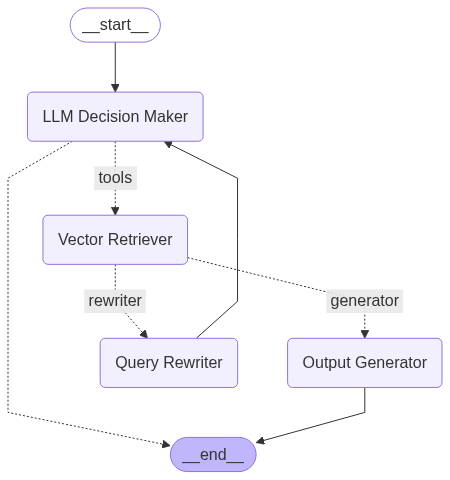

In [55]:
workflow.compile()

In [56]:
app = workflow.compile()

In [57]:
app.invoke({"messages": "Hey"})

-----Call LLM_Decision_Maker-----


{'messages': [HumanMessage(content='Hey', additional_kwargs={}, response_metadata={}, id='cf683072-bfcd-441c-94b4-847881a98ca0'),
  AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 74, 'total_tokens': 84, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BkpwFoCuKKfinGw7Y4yoLECyzHyfq', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--56b095c3-6761-4709-86be-a0c56793ad08-0', usage_metadata={'input_tokens': 74, 'output_tokens': 10, 'total_tokens': 84, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [58]:
app.invoke({"messages": "What is 2 + 2 ?"})

-----Call LLM_Decision_Maker-----


{'messages': [HumanMessage(content='What is 2 + 2 ?', additional_kwargs={}, response_metadata={}, id='8b021d13-a4c5-43da-894c-897cd79b10d0'),
  AIMessage(content='The sum of 2 + 2 is 4.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 81, 'total_tokens': 94, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BkpwJLelCWXaSo89r1y837A9uJYNM', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7c557f5c-317e-4135-8ee3-c9773ba99739-0', usage_metadata={'input_tokens': 81, 'output_tokens': 13, 'total_tokens': 94, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [59]:
app.invoke({"messages": "What is 2 + 2 in langgraph and aganetic ai ?"})

-----Call LLM_Decision_Maker-----


c:\Users\HP\miniconda3\envs\cv_collection_review_rnd\lib\site-packages\langchain_openai\chat_models\base.py:1643: UserWarning: Cannot use method='json_schema' with model gpt-3.5-turbo since it doesn't support OpenAI's Structured Output API. You can see supported models here: https://platform.openai.com/docs/guides/structured-outputs#supported-models. To fix this warning, set `method='function_calling'. Overriding to method='function_calling'.
  warnings.warn(


-----DECISION: Docs are NOT Relevant-----
-----REWRITE-----
-----Call LLM_Decision_Maker-----


c:\Users\HP\miniconda3\envs\cv_collection_review_rnd\lib\site-packages\langchain_openai\chat_models\base.py:1643: UserWarning: Cannot use method='json_schema' with model gpt-3.5-turbo since it doesn't support OpenAI's Structured Output API. You can see supported models here: https://platform.openai.com/docs/guides/structured-outputs#supported-models. To fix this warning, set `method='function_calling'. Overriding to method='function_calling'.
  warnings.warn(


-----DECISION: Docs are Relevant-----
-----GENERATE-----


{'messages': [HumanMessage(content='What is 2 + 2 in langgraph and aganetic ai ?', additional_kwargs={}, response_metadata={}, id='0855b2f0-ace5-4d35-af7f-c5e5bbb3e3dc'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_SjBrUS7EAv7d9JI83e4WRdPL', 'function': {'arguments': '{"query": "2 + 2 in langgraph"}', 'name': 'retriever_blog_post'}, 'type': 'function'}, {'id': 'call_6kc9549VrOzsqICi7gzgkQ1G', 'function': {'arguments': '{"query": "2 + 2 in aganetic ai"}', 'name': 'retriever_blog_post'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 63, 'prompt_tokens': 89, 'total_tokens': 152, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BkpwP9DSF6NIf2NHT5NyvzTYsyfQp', 'service_tier': 'defau

In [60]:
app.invoke({"messages": "What is langgraph and aganetic ai ?"})

-----Call LLM_Decision_Maker-----


c:\Users\HP\miniconda3\envs\cv_collection_review_rnd\lib\site-packages\langchain_openai\chat_models\base.py:1643: UserWarning: Cannot use method='json_schema' with model gpt-3.5-turbo since it doesn't support OpenAI's Structured Output API. You can see supported models here: https://platform.openai.com/docs/guides/structured-outputs#supported-models. To fix this warning, set `method='function_calling'. Overriding to method='function_calling'.
  warnings.warn(


-----DECISION: Docs are NOT Relevant-----
-----REWRITE-----
-----Call LLM_Decision_Maker-----


c:\Users\HP\miniconda3\envs\cv_collection_review_rnd\lib\site-packages\langchain_openai\chat_models\base.py:1643: UserWarning: Cannot use method='json_schema' with model gpt-3.5-turbo since it doesn't support OpenAI's Structured Output API. You can see supported models here: https://platform.openai.com/docs/guides/structured-outputs#supported-models. To fix this warning, set `method='function_calling'. Overriding to method='function_calling'.
  warnings.warn(


-----DECISION: Docs are NOT Relevant-----
-----REWRITE-----
-----Call LLM_Decision_Maker-----


c:\Users\HP\miniconda3\envs\cv_collection_review_rnd\lib\site-packages\langchain_openai\chat_models\base.py:1643: UserWarning: Cannot use method='json_schema' with model gpt-3.5-turbo since it doesn't support OpenAI's Structured Output API. You can see supported models here: https://platform.openai.com/docs/guides/structured-outputs#supported-models. To fix this warning, set `method='function_calling'. Overriding to method='function_calling'.
  warnings.warn(


-----DECISION: Docs are NOT Relevant-----
-----REWRITE-----
-----Call LLM_Decision_Maker-----


c:\Users\HP\miniconda3\envs\cv_collection_review_rnd\lib\site-packages\langchain_openai\chat_models\base.py:1643: UserWarning: Cannot use method='json_schema' with model gpt-3.5-turbo since it doesn't support OpenAI's Structured Output API. You can see supported models here: https://platform.openai.com/docs/guides/structured-outputs#supported-models. To fix this warning, set `method='function_calling'. Overriding to method='function_calling'.
  warnings.warn(


-----DECISION: Docs are NOT Relevant-----
-----REWRITE-----
-----Call LLM_Decision_Maker-----


c:\Users\HP\miniconda3\envs\cv_collection_review_rnd\lib\site-packages\langchain_openai\chat_models\base.py:1643: UserWarning: Cannot use method='json_schema' with model gpt-3.5-turbo since it doesn't support OpenAI's Structured Output API. You can see supported models here: https://platform.openai.com/docs/guides/structured-outputs#supported-models. To fix this warning, set `method='function_calling'. Overriding to method='function_calling'.
  warnings.warn(


-----DECISION: Docs are Relevant-----
-----GENERATE-----


{'messages': [HumanMessage(content='What is langgraph and aganetic ai ?', additional_kwargs={}, response_metadata={}, id='73082902-5b0e-4967-8ca4-b2a780967352'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_f0JtTi8VptPCZK4lf25nNDqJ', 'function': {'arguments': '{"query": "langgraph"}', 'name': 'retriever_blog_post'}, 'type': 'function'}, {'id': 'call_HcPWrvf7LjPNuzrZfW1RpjVY', 'function': {'arguments': '{"query": "aganetic AI"}', 'name': 'retriever_blog_post'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 83, 'total_tokens': 135, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bkpx3eYI3Fa4kwLZaQj62waFdB3Iv', 'service_tier': 'default', 'finish_reason': 'tool